<a href="https://colab.research.google.com/github/YusufWong/-YusufWong-CS448-Assignment3/blob/main/Yusuf%20Wong%20-%20Assignment%20%233.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# My Pokemon Linear Regression & k-NN Classification Notebook!
### By: Yusuf Wong

## <ins>Abstract</ins>
* For both Linear Regression **and** KNN (k-nearest neighbor) Classification, I've chosen to use this Pokemon dataset that I found online: https://www.kaggle.com/abcsds/pokemon **(Credits to Alberto Barradas for supplying this data for the community!)**
<br> 

* I chose this dataset because I absolutely love Pokemon (esp. PokemonGO!) and I thought it'd be a cool project to add to my resume and discuss with a recruiter/hiring manager (to show my personality/interests etc).  
<br> 

* This Pokemon Dataset has stats information related to each Pokemon from Generations 1-6. This includes: Name, #, Type(s), HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation #, and Boolean indicator for Legendary.
<br> 

* For this project, however, I intend to only focus on **Attack**, **Defense**, & **Type stats** for the regression and classification sections. I plan to analyze if there is a linear relationship between a Pokemon's Attack and Defense stats to predict a Pokemon's Defense values for any given Attack value. I also plan to use k-Nearest Neighbors classification to attempt to classify different Pokemon Types (i.e. grass, water, fire, etc) soley based on Attack and Defense Attributes. More info to come soon!
<br> 

* From this dataset, I hope to learn how to use dataframes from the Pandas library to read, interpret, and manipulate (i.e. split) data for my advantage. I also plan to learn how to use the matplotlib library to learn how to visualize and analyze my data. Finally, I plan to learn how to utilize the sklearn libraries for both regression and classification analysis, as well as experience first hand how to use machine learning to train my model with training data, test my model with the testing data, and investiage the accuracy/error rate of the model.

##  <ins>Section 1: Regression Dataset Prep</ins>

As mentioned before, this Pokemon Dataset has different columns of stats/info: <span style="color:red">Name, #, Type(s), HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation #, and a Boolean indicator for Legendary.</span>

See/Run the code below to see the head of the data. You can change the # of rows of data you'd like to see by inserting a number in Pokemon.head('#'). Remove the '.head(#)' to see all of the data!



In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
url = 'https://raw.githubusercontent.com/YusufWong/-YusufWong-CS448-Assignment3/main/Pokemon.csv'
Pokemon = pd.read_csv(url)#,index_col=0) #"Pokemon.csv")
#Note: there are over 700 different Pokemon among the 6 generations from this dataset. 
Pokemon.head(100) #Feel free to change this line of code to see all of them!

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


<span style="color:red">NOTE:</span>  There are more entries than Pokemon # because some Pokemon #'s repeat (for Mega Pokemon). For example, Venusaur and MEGA Venusaur both have the same Pokemon #, but the data is representing them as SEPARATE entities.

### For linear regression, I ONLY intend to focus on the quantitative Attack and Defense stats/columns to investigate if there is a linear relationship between these Pokemon attributes. Here is the head of the dataframe of the two sets of data I plan to use: 

In [ ]:
df_lr = Pokemon[["Attack", "Defense"]] #dataframe just for attack and defense
print("Here is the head of the first few rows of the dataframe:\n")
print("%s\n" % df_lr.head())
print("The total length of this dataframe is: %s rows of Attack & Defense values" % (len(df_lr)))


Here is the head of the first few rows of the dataframe:

   Attack  Defense
0      49       49
1      62       63
2      82       83
3     100      123
4      52       43

The total length of this dataframe is: 800 rows of Attack & Defense values


## <ins>Section 2: Linear Regression</ins>

### Splitting the data into training (66%) & testing sets (34%):

In [ ]:
from sklearn.model_selection import train_test_split
Attack, Defense = df_lr["Attack"].values.reshape(-1,1), df_lr["Defense"].values.reshape(-1,1)

#Note to Self: random_state = # to select for consistent randomization of splitting data into train and test sets
# i.e. picking the same random_state will yield the same randomized data set every time that number is selected
#Shuffle=true to randomize data (if not specified, default == True)
train_size = 0.66; #Use 66% of total data for training, rest is used for testing
Attack_train, Attack_test, Defense_train, Defense_test = train_test_split(Attack,Defense, shuffle=True, test_size=(1-train_size), random_state=42)



### Fitting & Visualizing Linear Regression Model onto training set:

Training/Total = 0.66
Linear Reg model: y = 0.4262776028919098x + 39.567234580378084
error_ideal = 1.0
error_train = 0.19336435328007595
error_test = 0.18778744089286303


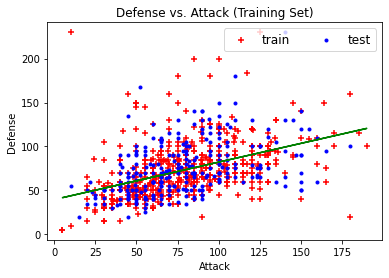

In [ ]:
from sklearn.linear_model import LinearRegression
lr_train = LinearRegression().fit(Attack_train,Defense_train)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1, 1), dpi=5000)
%matplotlib inline
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("Defense vs. Attack (Training Set)")
train = plt.scatter(Attack_train,Defense_train,color='red',marker='+')
test = plt.scatter(Attack_test,Defense_test,color='blue',marker='.')

best_fit = plt.plot(Attack_train, lr_train.predict(Attack_train), color = "green")

plt.legend((train, test,),
           ('train', 'test'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

print("Training/Total = %s" % (train_size))
b = float(lr_train.intercept_)
m = float(lr_train.coef_)
print("Linear Reg model: y = %sx + %s" % (m,b))
print("error_ideal = 1.0")
error_training = lr_train.score(Attack_train, Defense_train)
print("error_train = %s" % (error_training))
error_test = lr_train.score(Attack_test, Defense_test)
print("error_test = %s" % (error_test))

### Error Rate

In [ ]:
print("Training/Total = %s" % (train_size))
b = float(lr_train.intercept_)
m = float(lr_train.coef_)
print("Linear Reg model: y = %sx + %s" % (m,b))
print("error_ideal = 1.0")
error_training = lr_train.score(Attack_train, Defense_train)
print("error_train = %s" % (error_training))
error_test = lr_train.score(Attack_test, Defense_test)
print("error_test = %s" % (error_test))

Training/Total = 0.66
Linear Reg model: y = 0.4262776028919098x + 39.567234580378084
error_ideal = 1.0
error_train = 0.19336435328007595
error_test = 0.18778744089286303


* The error rates for both the training set and the test set represent the R^2 value that's often used during linear regression. If there was a perfect dataset where there exists a line that can perfectly go through *ALL* of the datapoint, then this R^2 = 1. However, this is clearly *NOT* the case here, since the error rates are approx 0.19 for both the training and test sets. At first glance, this linear model doesn't fit well with the data.
<br>

* However, THIS IS ACTUALLY A GOOD THING! An important thing to notice is that the Attack and Defense values are only integers and the range of values for Attack are approximately between 0->175ish. **IF** there was a perfect line of best fit (i.e. R^2 = 1), then there would only be 175 corresponding Defense Values that perfectly fit on that line, which would be impossible if you want to create a large and diverse Pokemon universe with different qualities and characteristics, especially when it comes to Attack and Defense. In other words, the smaller the R^2 value, the more diversity and variation you get, which makes the game more interesting, especially if you add other attributes such as HP, Sp. Attack/Defense, Speeds, and movesets (which are not included in this dataset). Thus, it's actually better that there ISN'T a strong linear relationship between these two quantitative datasets!<br>

##  <ins>Section 3: Classification Dataset Prep</ins>

### I plan to use the same Pokemon dataset for classification. I intend to use the different Types (i.e. grass, poison, fire, water, bug, etc.) to classify the different Pokemon based on the Attack and Defense quantitative datasets. Here is the head of the first 10 Pokemons as a reminder:

In [ ]:
Pokemon.head(10) #Note: a number can be inserted (i.e. ".head(#)"), to find any first # of rows of the dataset

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


It's important to see that not all Types are created equal if I use either column "Type 1" or "Type 2". Each Pokemon listed has a Type 1, but not every Pokemon has a Type 2. If I want to equally represent this Pokemon universe's qualitative Type dataset, this data needs to be prepped and reinterpreted differently.

### Because some pokemon can have two types, I initially separated the Pokemon Data into 2 parts: Type 1 & Type 2. Here is the head of the list of Pokemon who have Type 1 (basically all of them).

In [ ]:
Type_1 = Pokemon[["Name", "Type 1", "Attack", "Defense"]]
Type_1.head(10)

,Name,Type 1,Attack,Defense
0,Bulbasaur,Grass,49,49
1,Ivysaur,Grass,62,63
2,Venusaur,Grass,82,83
3,VenusaurMega Venusaur,Grass,100,123
4,Charmander,Fire,52,43
5,Charmeleon,Fire,64,58
6,Charizard,Fire,84,78
7,CharizardMega Charizard X,Fire,130,111
8,CharizardMega Charizard Y,Fire,104,78
9,Squirtle,Water,48,65


### Here is the head of the list of all Pokemon that also have a 2nd Type (I used the function ".notna()" to only select rows that DON'T have null values):

In [ ]:
Type_2 = Pokemon[Pokemon["Type 2"].notna()] #i.e. Type 2 == NOT null
Type_2 = Type_2[["Name", "Type 2", "Attack", "Defense"]]
Type_2.head(10)


,Name,Type 2,Attack,Defense
0,Bulbasaur,Poison,49,49
1,Ivysaur,Poison,62,63
2,Venusaur,Poison,82,83
3,VenusaurMega Venusaur,Poison,100,123
6,Charizard,Flying,84,78
7,CharizardMega Charizard X,Dragon,130,111
8,CharizardMega Charizard Y,Flying,104,78
15,Butterfree,Flying,45,50
16,Weedle,Poison,35,30
17,Kakuna,Poison,25,50


You'll notice by now that I separated the dataset into two different parts so that Pokemon like Bulbasaur can be represented twice: Attack/Defense Values for Grass AND Poison (for equal representation). 

### Now it's time to concatenate the two datasets. I also created two new columns called "Type" and "Type Numeric" that will read the information from Type 1 and Type 2 columns and convert them to the appropiate strings/ints I need. Here is the head of the All_Types dataframe (feel free to remove the ".head()" and see the entire list and scroll to see the duplication to understand why splitting, modifying, and concatenating was necessary!):

In [ ]:
All_Types = pd.concat([Type_1, Type_2])
import numpy as np
All_Types = All_Types.replace(np.nan, '', regex=True)
All_Types["Type"] = All_Types["Type 1"].astype(str) + All_Types["Type 2"].astype(str)
All_Types["Type_Numeric"] = All_Types["Type"] #Copy String Values to Numeric Column temporarily 
All_Types = All_Types[["Name", "Attack", "Defense","Type","Type_Numeric"]] #Isolate columns of interest
All_Types.head(20)

,Name,Attack,Defense,Type,Type_Numeric
0,Bulbasaur,49,49,Grass,Grass
1,Ivysaur,62,63,Grass,Grass
2,Venusaur,82,83,Grass,Grass
3,VenusaurMega Venusaur,100,123,Grass,Grass
4,Charmander,52,43,Fire,Fire
5,Charmeleon,64,58,Fire,Fire
6,Charizard,84,78,Fire,Fire
7,CharizardMega Charizard X,130,111,Fire,Fire
8,CharizardMega Charizard Y,104,78,Fire,Fire
9,Squirtle,48,65,Water,Water


It's important to note that a lot of Pokemon get duplicated, which is fine because most have dual types.

### Now to see the unique Types of Pokemon and create a Numeric list of integer to map them:

In [ ]:
List_Type = sorted(set(All_Types.Type.unique())) #Note: We're alphabetically sorting the list of strings
print("There are %s different Pokemon Types (sorted alphabetically!): \n\nList_Type = " % (len(List_Type)), List_Type)

List_Numeric = list(range(1,len(All_Types.Type.unique())+1 ))
print("\nThe list of different types will correspond to the following list (respectively):\n List_Num = ",List_Numeric)

There are 18 different Pokemon Types (sorted alphabetically!): 

List_Type =  ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

The list of different types will correspond to the following list (respectively):
 List_Num =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Now to modify the Type_Numeric Column to MAP each string Type to the corresponding numeric integer (up until this point, this is the FINAL modification to the dataset, and I'll be using information from here to conduct my classification):

In [ ]:
All_Types["Type_Numeric"].replace(List_Type,List_Numeric,inplace=True, limit=None, regex=True)
All_Types.head(20)

,Name,Attack,Defense,Type,Type_Numeric
0,Bulbasaur,49,49,Grass,10
1,Ivysaur,62,63,Grass,10
2,Venusaur,82,83,Grass,10
3,VenusaurMega Venusaur,100,123,Grass,10
4,Charmander,52,43,Fire,7
5,Charmeleon,64,58,Fire,7
6,Charizard,84,78,Fire,7
7,CharizardMega Charizard X,130,111,Fire,7
8,CharizardMega Charizard Y,104,78,Fire,7
9,Squirtle,48,65,Water,18


##  <ins>Section 4: Classification</ins> (Finally!)

### Time to allocate "x" as the quantitate array of datasets (i.e. Attack & defense) and "y" as the qualative data that's numerically represented in integer form, as well as Splitting these datasets into training (50%) and test (50%) sets:

In [ ]:
x = All_Types.iloc[:,1:3] #NOTE: we are representing the quantitative data(s) as x
y = All_Types.iloc[:,4] #Note: we are representing the QUALITATIVE data as y (in integer-form!)
train_size = 0.5
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=(1-train_size), random_state=42)

### Now use the k-NN Classifier Library:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23, p=2) #p=1->metric='manhattan_dst', if p=2 -> metric='euclidean'

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

### Error Rate

In [ ]:
print("Error_ideal = %s" % knn.score(x_train,knn.predict(x_train))) #Use control as reference
print("Error_train = %s" % knn.score(x_train,y_train)) #Use training data as inputs
print("Error_test = %s" % knn.score(x_test,y_test)) #Use TEST data as inputs

Error_ideal = 1.0
Error_train = 0.19769357495881384
Error_test = 0.10543657331136738


After playing around with different sizes of odd n_neighbors, the error for the training and test data was still arguably low compared to the ideal value of 1.0. I kinda figured this would happen because the number of different Types of Pokemon is very high and it would be hard to classify one type among the 17 others within a small range of values for both Attack and Defense. Additionally, even if this wasn't the case, it's also a good thing this value is low because there's no classifying relationship between the Type of a Pokemon and its Attack and Defense, which increases Nintendo's ultimate goal of really trying to create a diverse universe of Pokemon, no matter the Type. This would also make the game more challenging and interesting for users when fighting in combat with Pokemon of different type combinations.

##  <ins>Conclusion:</ins>

* So for the first part of the project, I tried to determine if there was a linear relationship between a Pokemon's Attack and Defense stats in the Pokemon universe for Generations 1-6. After splitting the data with 66%=training set and 34%=test set, I ploted the scatter data and the line of best fit. I determined that the error_score was very low (approx 0.19 for both training and test sets) compared to an ideal score of R^2 = 1.0. In other words, there was NOT a strong linear relationship between a Pokemon's Attack and Defense stats. Nonetheless, this was actually a very good thing because if the line was perfect, then there wouldn't be such a diverse universe of Pokemon; the game itself would be boring if there was a strong linear relationship. The fact that the score was very low implies that there is a lot of randomness/variation of Pokemon with different combinations of Attack and Defense, making the game more interesting and enjoyable =).
<br>

* For the 2nd part of the project, I used the 18 different Pokemon Types (i.e. water, fire, grass, bug, etc) as the qualitative dataset for my k-NN Classification. It required a lot of data manipulation to represent the data fairly, since a lot of Pokemon have 2 Types instead of 1. As a result, I had to split the Pokemon data, make modifications, concatenate the data to represent the Pokemon universe's Types fairly, and then map the 18 different Types to a Numeric Integer list. After doing all of this work, I then split 50% for training and 50% for testing, and tried to use the k-Nearest Neighbors classification algorithm to classify different Pokemon Types (qualitative data) solely based on each type's Attack and Defense attributes. However, after looking at the error_score for the training and test sets, both were arguably low compared to an ideal error_score = 1.0. This implies that the k-NN model was either not a good model to try to classify different Pokemon Types based on each Type's Attack and Defense stats OR there really isn't a relationship between Types and the Attack/Defense stats of Pokemon, which is great for Nintendo to diversify the Pokemon universe. It would also be hard to visualize 18 unique types of Pokemon on a plot.
<br>

* What was interesting about this project was doing the linear regression on the Attack and Defense stats of all the Pokemon in the universe. I was glad to see that there wasn't a strong linear relationship between these stats and it shows that Nintendo HAS been doing a very good job in trying to make a diverse Pokemon universe with different combinations of stats, thus making the game more fun!
<br>

* To extend the project further, I would test the other quantitative datasets (i.e. special attack vs special defense, or HP vs. Speed) to see if my hypothesis is still true about the diversity of the Pokemon universe, or perhaps see that there IS a linear relationship between these other datasets (who knows!)

##  Me at the End of this Project:

# ![](https://github.com/YusufWong/-YusufWong-CS448-Assignment3/blob/main/SquirtleMeme.jpg?raw=1)